# VISUAL TRANSFORMER TRAINING

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, RandomSampler
import torch.optim as optim

import os
os.chdir("..")
BASE_DIR = os.getcwd()

from utils.vit_2 import ViTClassifier, PneumoniaDataset
from utils.vit_utils import VitUtilities

### Define The Model

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTClassifier().to(device)

print("ViT Classifier Initialized!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


ViT Classifier Initialized!


### Define Dataset

In [3]:
CLASS_NAMES = {"pneumonia": 0, "normal": 1}

# train_dir = os.path.join(BASE_DIR, r"data\clsif\train")
# val_dir = os.path.join(BASE_DIR, r"data\clsif\val")

train_dir = '/content/drive/MyDrive/pneumonia_data/data/clsif/train'
val_dir = '/content/drive/MyDrive/pneumonia_data/data/clsif/val'
test_dir = '/content/drive/MyDrive/pneumonia_data/data/clsif/test'

train_dataset = PneumoniaDataset(train_dir, CLASS_NAMES)
val_dataset = PneumoniaDataset(val_dir, CLASS_NAMES)
test_dataset = PneumoniaDataset(test_dir, CLASS_NAMES)

print(f"Training Samples: {len(train_dataset)}, Validation Samples: {len(val_dataset)}")

Training Samples: 8913, Validation Samples: 2972


### Define DataLoaders

In [4]:
train_loader = DataLoader(train_dataset, batch_size=8, sampler=RandomSampler(train_dataset), num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, pin_memory=True)

print(f"DataLoaders Created Successfully")

DataLoaders Created Successfully


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Load The Model (optional)

In [5]:
# model.load_state_dict(torch.load(os.path.join(BASE_DIR, r"model\vit_pneumonia_classifier_BESTEVER.pth"), map_location=torch.device('cpu')))
# model.to(device)  
# model.train()

### Define Criterion and Optimizer

In [6]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW([
        {'params': model.vit.patch_embed.parameters(), 'lr': 1e-6}, 
        {'params': model.vit.blocks[:-6].parameters(), 'lr': 3e-5},  
        {'params': model.vit.blocks[-6:-3].parameters(), 'lr': 1e-4},
        {'params': model.vit.blocks[-3:].parameters(), 'lr': 3e-4},  
        {'params': model.vit.head.parameters(), 'lr': 1e-3}           
    ])

### Train The Model

In [7]:
epochs = 10

VitUtilities.train_vit(model, train_loader, val_loader, optimizer, criterion, device, epochs)
torch.save(model.state_dict(), os.path.join(BASE_DIR, r"model\vit_pneumonia_classifier_BESTEVER.pth"))

print("Model Saved Successfully!")

Epoch 1/10 [Train]: 100%|██████████| 1115/1115 [08:01<00:00,  2.32it/s, loss=0.0211]



Epoch 1/10 Results:
  Train Loss: 0.3425
  Val Accuracy: 0.9263
  Precision: 0.9439 | Recall: 0.9316 | F1: 0.9377 | AUC: 0.9752
  Sensitivity: 0.9316 | Specificity: 0.9185


Epoch 2/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 2/10 [Train]: 100%|██████████| 1115/1115 [07:50<00:00,  2.37it/s, loss=0.0053]



Epoch 2/10 Results:
  Train Loss: 0.2760
  Val Accuracy: 0.9337
  Precision: 0.9451 | Recall: 0.9435 | F1: 0.9443 | AUC: 0.9814
  Sensitivity: 0.9435 | Specificity: 0.9193


Epoch 3/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 3/10 [Train]: 100%|██████████| 1115/1115 [07:56<00:00,  2.34it/s, loss=0.0103]



Epoch 3/10 Results:
  Train Loss: 0.2329
  Val Accuracy: 0.9344
  Precision: 0.9382 | Recall: 0.9525 | F1: 0.9453 | AUC: 0.9797
  Sensitivity: 0.9525 | Specificity: 0.9077


Epoch 4/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 4/10 [Train]: 100%|██████████| 1115/1115 [07:55<00:00,  2.34it/s, loss=0.0080]



Epoch 4/10 Results:
  Train Loss: 0.2364
  Val Accuracy: 0.9347
  Precision: 0.9597 | Recall: 0.9294 | F1: 0.9443 | AUC: 0.9815
  Sensitivity: 0.9294 | Specificity: 0.9426


Epoch 5/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 5/10 [Train]: 100%|██████████| 1115/1115 [08:05<00:00,  2.29it/s, loss=0.0020]



Epoch 5/10 Results:
  Train Loss: 0.2329
  Val Accuracy: 0.9253
  Precision: 0.9023 | Recall: 0.9808 | F1: 0.9399 | AUC: 0.9781
  Sensitivity: 0.9808 | Specificity: 0.8436


Epoch 6/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 6/10 [Train]: 100%|██████████| 1115/1115 [07:53<00:00,  2.36it/s, loss=0.0018]



Epoch 6/10 Results:
  Train Loss: 0.2389
  Val Accuracy: 0.9351
  Precision: 0.9508 | Recall: 0.9395 | F1: 0.9452 | AUC: 0.9820
  Sensitivity: 0.9395 | Specificity: 0.9285


Epoch 7/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 7/10 [Train]: 100%|██████████| 1115/1115 [08:03<00:00,  2.31it/s, loss=0.0149]



Epoch 7/10 Results:
  Train Loss: 0.2181
  Val Accuracy: 0.9145
  Precision: 0.8809 | Recall: 0.9904 | F1: 0.9324 | AUC: 0.9765
  Sensitivity: 0.9904 | Specificity: 0.8028


Epoch 8/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 8/10 [Train]: 100%|██████████| 1115/1115 [07:53<00:00,  2.35it/s, loss=0.0319]



Epoch 8/10 Results:
  Train Loss: 0.2243
  Val Accuracy: 0.9243
  Precision: 0.9552 | Recall: 0.9158 | F1: 0.9351 | AUC: 0.9805
  Sensitivity: 0.9158 | Specificity: 0.9368


Epoch 9/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 9/10 [Train]: 100%|██████████| 1115/1115 [07:54<00:00,  2.35it/s, loss=0.0048]



Epoch 9/10 Results:
  Train Loss: 0.2236
  Val Accuracy: 0.9378
  Precision: 0.9450 | Recall: 0.9508 | F1: 0.9479 | AUC: 0.9790
  Sensitivity: 0.9508 | Specificity: 0.9185


Epoch 10/10 [Train]:   0%|          | 0/1115 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 10/10 [Train]: 100%|██████████| 1115/1115 [07:54<00:00,  2.35it/s, loss=0.0076]



Epoch 10/10 Results:
  Train Loss: 0.2252
  Val Accuracy: 0.9290
  Precision: 0.9519 | Recall: 0.9277 | F1: 0.9396 | AUC: 0.9794
  Sensitivity: 0.9277 | Specificity: 0.9309

✅ Training Complete!
Final Confusion Matrix:
[[1119   83]
 [ 128 1642]]
Model Saved Successfully!


### Prediction with Visualisation

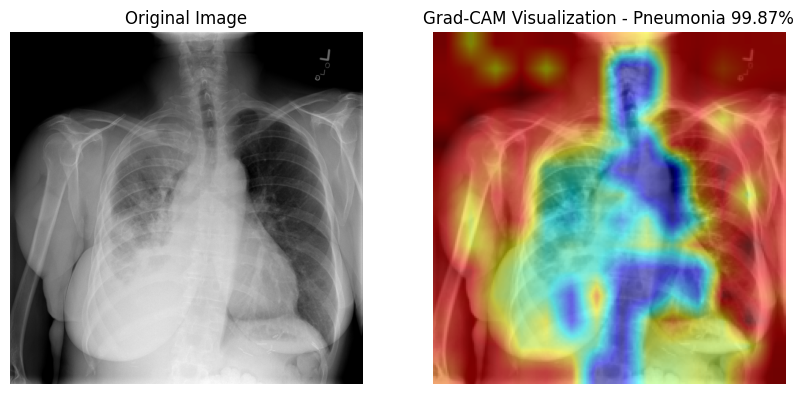

In [13]:
image_path = r"/content/drive/MyDrive/pneumonia_data/data/clsif/test/pneumonia/3e310709-b9b9-49c3-b2fc-cc82c5b8018a.png"
# image_path = r"/content/drive/MyDrive/pneumonia_data/data/clsif/test/pneumonia/3e881f10-28aa-4626-a79a-50cc014b7a1a.png"

VitUtilities.visualize_gradcam(model, image_path, device)

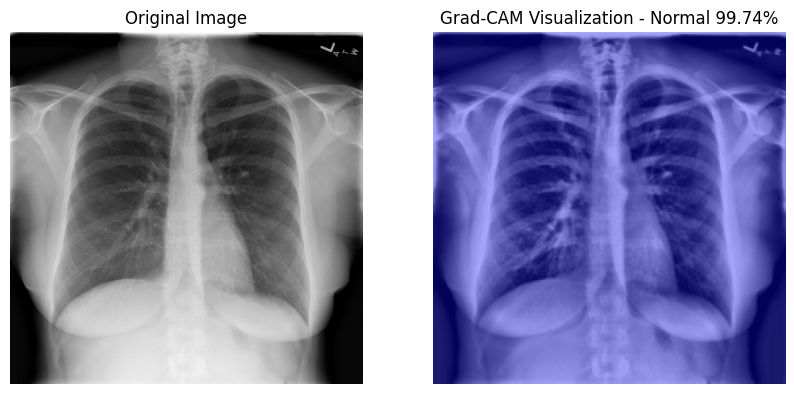

In [12]:
image_path = r"/content/drive/MyDrive/pneumonia_data/data/clsif/test/normal/4832fecc-3de6-47da-adee-11be7e213575.png"

VitUtilities.visualize_gradcam(model, image_path, device)

Visualizing Image 1


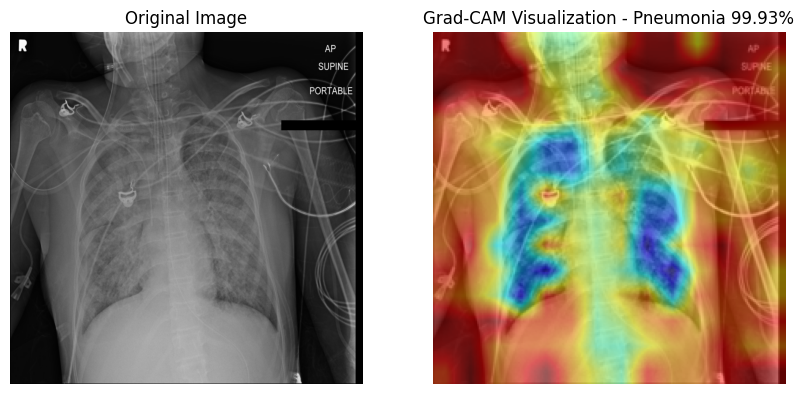

Visualizing Image 2


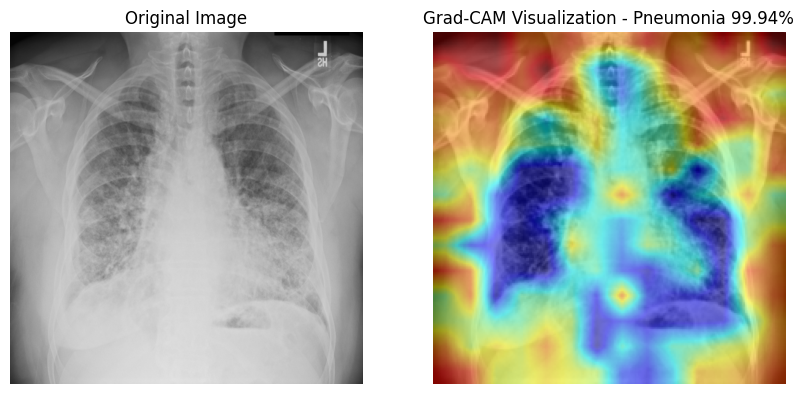

Visualizing Image 3


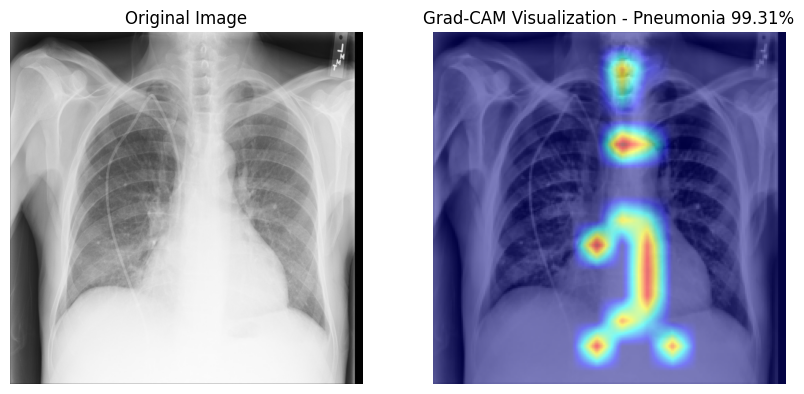

Visualizing Image 4


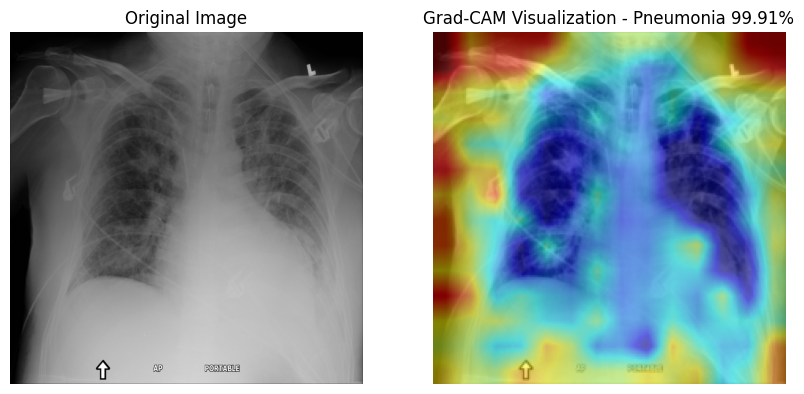

Visualizing Image 5


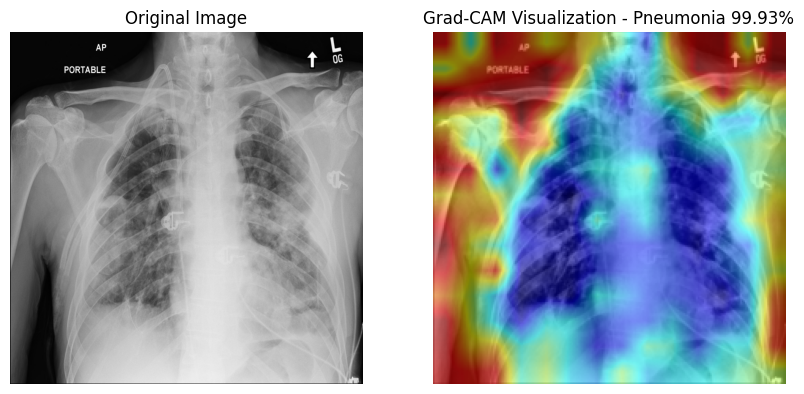

In [ ]:
import os

test_dir = r"/content/drive/MyDrive/pneumonia_data/data/clsif/test/pneumonia"

image_paths = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])[:5]

for i, path in enumerate(image_paths):
    print(f"Visualizing Image {i+1}")
    VitUtilities.visualize_gradcam(model, path, device)  

Visualizing Image 1


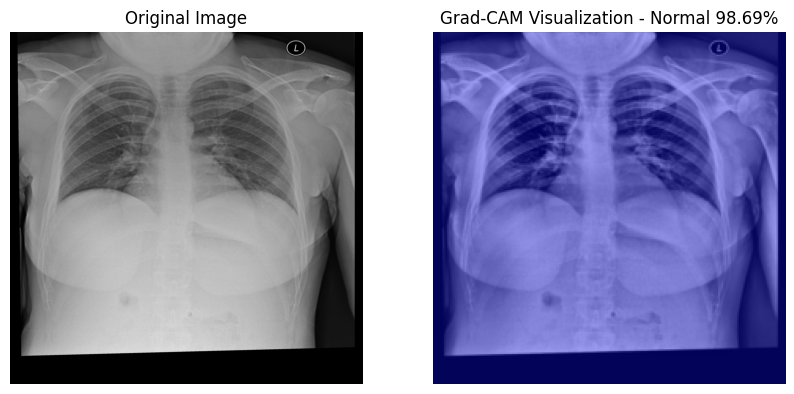

Visualizing Image 2


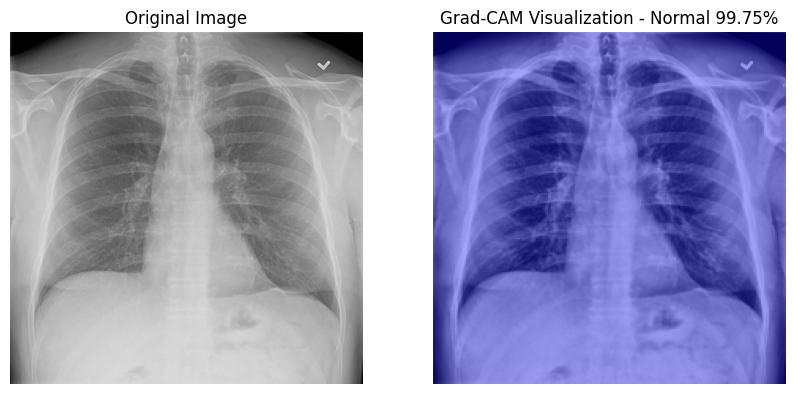

Visualizing Image 3


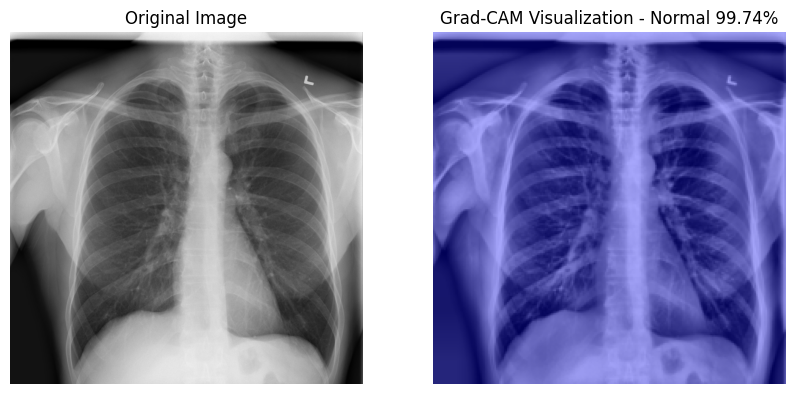

Visualizing Image 4


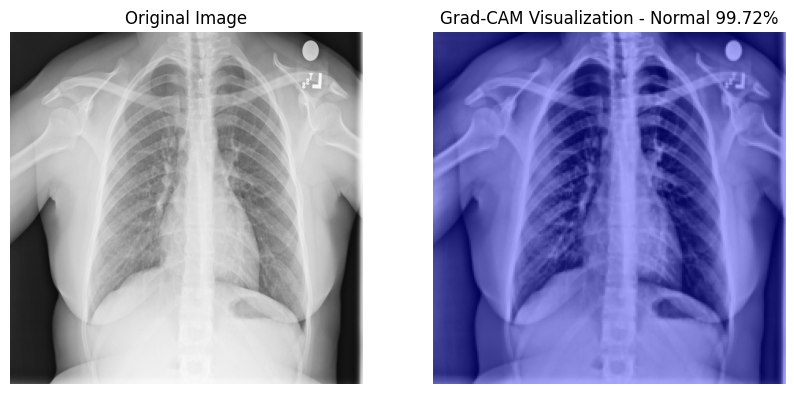

Visualizing Image 5


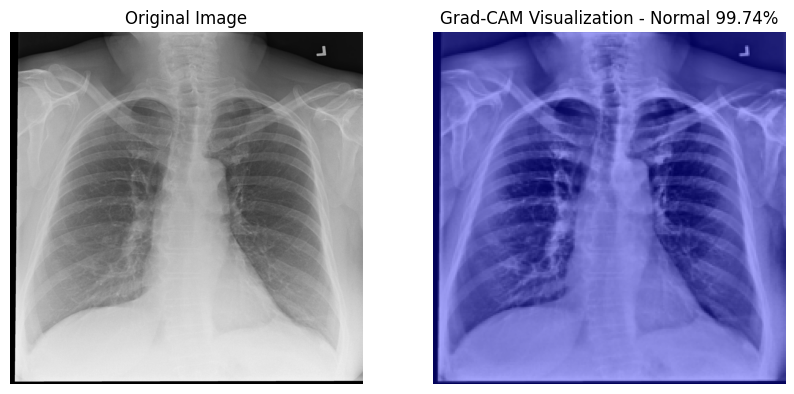

In [20]:
import os

test_dir = r"/content/drive/MyDrive/pneumonia_data/data/clsif/test/normal"

image_paths = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])[:5]

for i, path in enumerate(image_paths):
    print(f"Visualizing Image {i+1}")
    VitUtilities.visualize_gradcam(model, path, device)  # displays internally